# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [5]:
%matplotlib inline
import pandas as pd

In [2]:
# df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")
# df.head()

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [3]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")
df.head()

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 36.7 s, sys: 7.09 s, total: 43.8 s
Wall time: 48.4 s


### Look at the first few rows

Make sure you can see **every single column.**

In [4]:
pd.options.display.max_columns

20

In [5]:
pd.set_option("display.max_columns", 100)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [2]:
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", usecols=["Created Date", "Closed Date", "Agency", "Agency Name", "Complaint Type", "Descriptor", "Borough"])
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN


In [6]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [3]:
%%time
pd.to_datetime(df["Created Date"]).head(10000)

KeyboardInterrupt: 

In [7]:
%%time
first_ten_thousand = df["Created Date"].head(10000)
pd.to_datetime(first_ten_thousand)

CPU times: user 2.86 s, sys: 22.2 ms, total: 2.88 s
Wall time: 2.91 s


### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [8]:
%%time
df["created_at"] = pd.to_datetime(df["Created Date"], format="%m/%d/%Y %H:%M:%S %p")

CPU times: user 10.2 s, sys: 127 ms, total: 10.3 s
Wall time: 10.3 s


In [9]:
df["closed_at"] = pd.to_datetime(df["Closed Date"], format="%m/%d/%Y %H:%M:%S %p")

In [10]:
df.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 10:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 01:53:45,2015-09-04 06:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 09:15:43,2015-09-04 10:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 05:21:18


### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [11]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Agency Name               object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [12]:
df["Agency"].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [14]:
df.head()
### Complaint type is the type of problem. Descripter is the source, or what caused the problem

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 10:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 01:53:45,2015-09-04 06:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 09:15:43,2015-09-04 10:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 05:21:18


## What are the most popular categories of complaints for the NYPD? For the DOT?

In [13]:
df[df["Agency"] == "NYPD"]["Complaint Type"].value_counts()

Noise - Residential            429932
Blocked Driveway               219927
Illegal Parking                215158
Noise - Street/Sidewalk        112890
Noise - Commercial              93115
Derelict Vehicle                50758
Noise - Vehicle                 43213
Animal Abuse                    20609
Non-Emergency Police Matter     16716
Traffic                         10825
Homeless Encampment             10053
Vending                          8894
Noise - Park                     7995
Drinking                         2942
Noise - House of Worship         1991
Posting Advertisement            1781
Urinating in Public              1118
Bike/Roller/Skate Chronic         829
Panhandling                       797
Disorderly Youth                  547
Illegal Fireworks                 383
Drug Activity                     370
Graffiti                          249
Agency Issues                      12
Squeegee                            9
Maintenance or Facility             2
Ferry Compla

## When people are complaining about street conditions, what are they usually complaining about?

In [15]:
df[df["Complaint Type"] == "Street Condition"]["Descriptor"].value_counts()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Blocked - Construction              7034
Line/Marking - Faded                5230
Plate Condition - Noisy             3405
Wear & Tear                         2555
Plate Condition - Shifted           2004
Plate Condition - Open               671
Line/Marking - After Repaving        513
Dumpster - Construction Waste        181
Hummock                              177
Guard Rail - Street                  145
Crash Cushion Defect                 118
Maintenance Cover                     85
Unsafe Worksite                       56
Depression Maintenance                39
Strip Paving                          34
Plate Condition - Anti-Skid           25
Dumpster - Causing Damage             17
General Bad Condition                 15
Defacement                            15
Suspected Street

## What kinds of noise are they complaining about when making residential noise complaints?

In [16]:
df[df["Complaint Type"] == "Noise - Residential"]["Descriptor"].value_counts()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [21]:
df.set_index("created_at", inplace = True)

In [30]:
df.head()
df.index.month.value_counts()

5     180530
6     176301
3     165711
9     162468
7     160381
4     158139
8     157008
10    150475
12    142476
11    135985
2     128303
1     126501
Name: created_at, dtype: int64

## Plot how many requests were filed each month

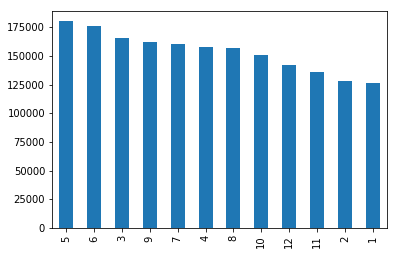

In [48]:
df.index.month.value_counts().plot(kind="bar")

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

## Time of day

### What time of day do people complain?

In [57]:
df.head()
#df.index.hour

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,,
2015-09-04 10:55:25,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54
2015-09-04 01:53:45,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 06:37:24
2015-09-04 09:15:43,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 10:32:01
2015-09-05 01:06:57,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 02:26:43
2015-09-04 07:48:25,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 05:21:18


### What time of day do people complain about potholes?

### What time of day do people complain about loud parties?

## Days of the week

### What days of the week do people complain about potholes?

### What days of the week do people complain about loud parties?

### What do you think is the best kind of graph for describing day of the week complaints?

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

## What holiday(s) are most popular for illegal fireworks?

## Plot all kinds of noise complaints on top of each other